In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


In [9]:
raw_pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
raw_pop.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),고령인구,고령인구,고령인구
1,자치구별(1),자치구별(2),소계,남자,여자
2,합계,소계,1691853,749118,942735
3,NaN,종로구,27187,11986,15201
4,NaN,중구,24374,10637,13737


In [11]:
pop = raw_pop.drop(index=[0, 1, 2], columns=['자치구별(1)'])
pop.columns = ["구별", "노령인구", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)

In [12]:
raw_medical = pd.read_excel("./data/의료기관(구별)(2010년+이후)_20241219181017.xlsx")
raw_medical.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,...,2023.20,2023.21,2023.22,2023.23,2023.24,2023.25,2023.26,2023.27,2023.28,2023.29
0,자치구별(1),자치구별(2),계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,자치구별(1),자치구별(2),소계,소계,종합병원,종합병원,병원,병원,의원,의원,...,치과병원,치과병원,치과의원,치과의원,한방병원,한방병원,한방의원,한방의원,조산원,조산원
2,자치구별(1),자치구별(2),병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,...,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수,병원수,병상수
3,서울시,소계,18777,90308,56,33800,228,16830,9668,9099,...,60,73,4863,56,85,5250,3624,1467,3,7
4,NaN,종로구,482,3711,4,3026,2,238,203,98,...,1,40,147,-,2,193,113,20,-,-


In [13]:
medical = raw_medical.drop(index=[0, 1, 2, 3])
medical = medical.iloc[:, 1:4]
medical.columns = ['구별', '병원수', '병상수']
medical.reset_index(inplace=True, drop=True)
medical.head()

,구별,병원수,병상수
0,종로구,482,3711
1,중구,595,992
2,용산구,327,863
3,성동구,478,1830
4,광진구,579,2580


In [18]:
raw_pharmacy = pd.read_excel('./data/의약품+제조+및+판매업+현황(동별)_20241219191910.xlsx')
raw_pharmacy.head

,동별(1),동별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14,2023.15
0,동별(1),동별(2),제조업소,제조업소,제조업소,제조업소,제조업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소,판매업소
1,동별(1),동별(2),소계,의약품,의약외품,의료기기,화장품,소계,약국,한약국,약업사,의약품도매상,한약도매상,한약업사,매약상,의료기기판매업,의료기기임대업,의료기기수리업
2,합계,소계,1500,73,49,798,580,31329,5398,229,1,1075,173,43,-,23725,50,635
3,NaN,종로구,37,2,2,18,15,957,177,17,-,25,1,4,-,702,-,31
4,NaN,중구,28,-,-,19,9,1111,175,1,-,22,-,-,-,889,-,24


In [32]:
pharmacy = raw_pharmacy.iloc[3:, [1,7,8]]
pharmacy.columns = ['구별', '약국', '한약국']
pharmacy.head()

,구별,약국,한약국
3,종로구,957,177
4,중구,1111,175
5,용산구,785,122
6,성동구,987,145
7,광진구,1041,182


In [33]:
result_medical = medical.merge(right=pop, right_on='구별', left_on='구별').merge(right=pharmacy, right_on='구별', left_on='구별')
result_medical.drop(columns=['노령인구_남자', '노령인구_여자'], inplace=True)
result_medical.head()

,구별,병원수,병상수,노령인구,약국,한약국
0,종로구,482,3711,27187,957,177
1,중구,595,992,24374,1111,175
2,용산구,327,863,37740,785,122
3,성동구,478,1830,47907,987,145
4,광진구,579,2580,55697,1041,182


In [44]:
result_medical['약국개수'] = result_medical['약국'] + result_medical['한약국']
result_medical['기준개수(병원)'] = result_medical['병원수'] / result_medical['노령인구'] * 1000
result_medical['기준개수(병상)'] = result_medical['병상수'] / result_medical['노령인구'] * 1000
result_medical['기준개수(약국)'] = result_medical['약국개수'] / result_medical['노령인구'] * 1000
result_medical.head()

,구별,병원수,병상수,노령인구,약국,한약국,약국개수,기준개수(병원),기준개수(병상),기준개수(약국)
0,종로구,482,3711,27187,957,177,1134,17.729062,136.499062,41.711112
1,중구,595,992,24374,1111,175,1286,24.411258,40.699106,52.761139
2,용산구,327,863,37740,785,122,907,8.664547,22.866985,24.032856
3,성동구,478,1830,47907,987,145,1132,9.977665,38.199011,23.629115
4,광진구,579,2580,55697,1041,182,1223,10.395533,46.322064,21.958095


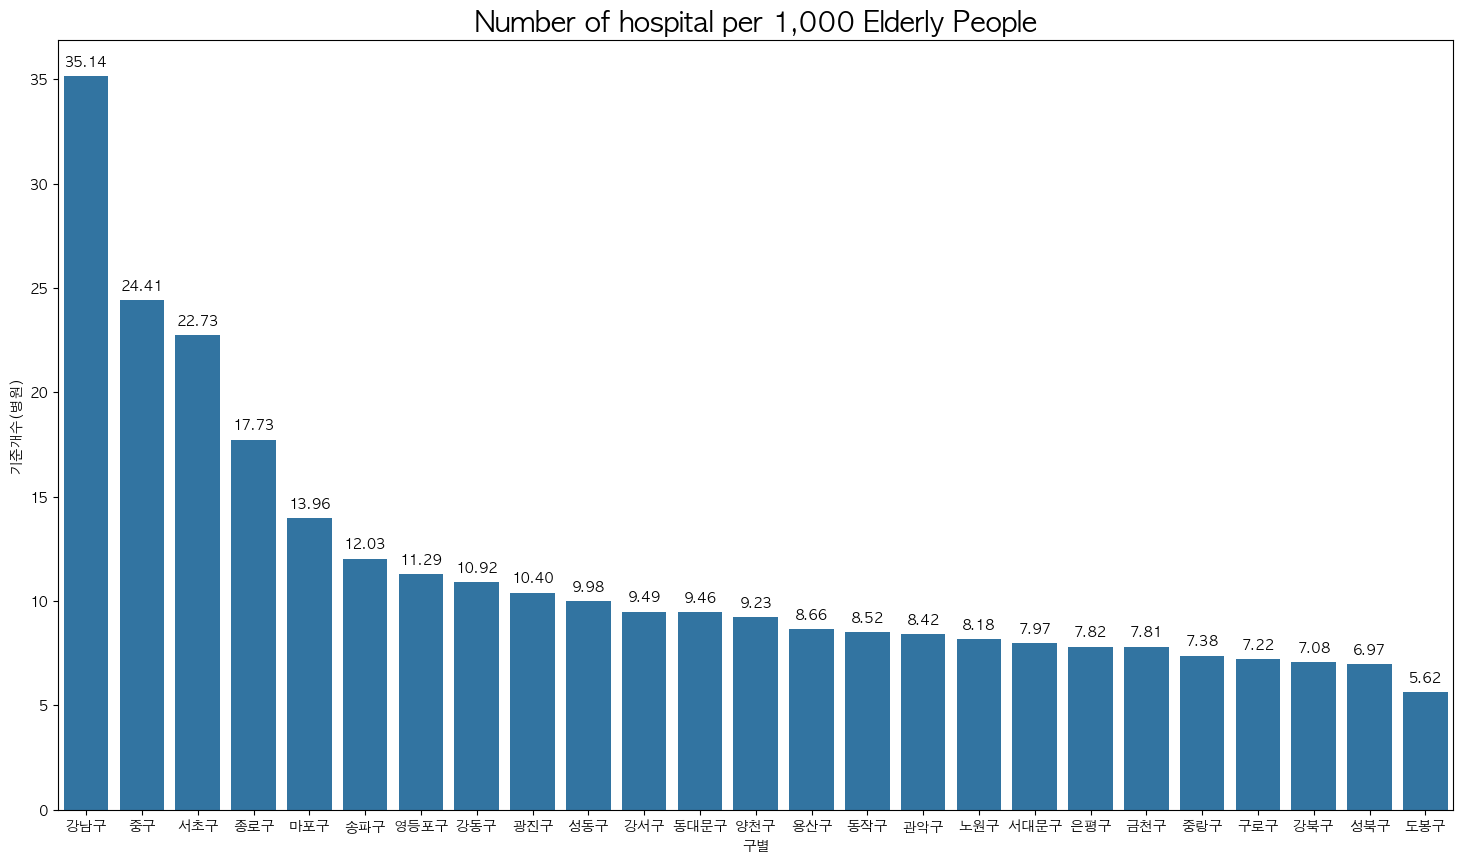

In [48]:
medical_sorted = result_medical.sort_values(by='기준개수(병원)', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=medical_sorted, x='구별', y='기준개수(병원)')
plt.title("Number of hospital per 1,000 Elderly People", fontdict={'fontsize' : 20})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

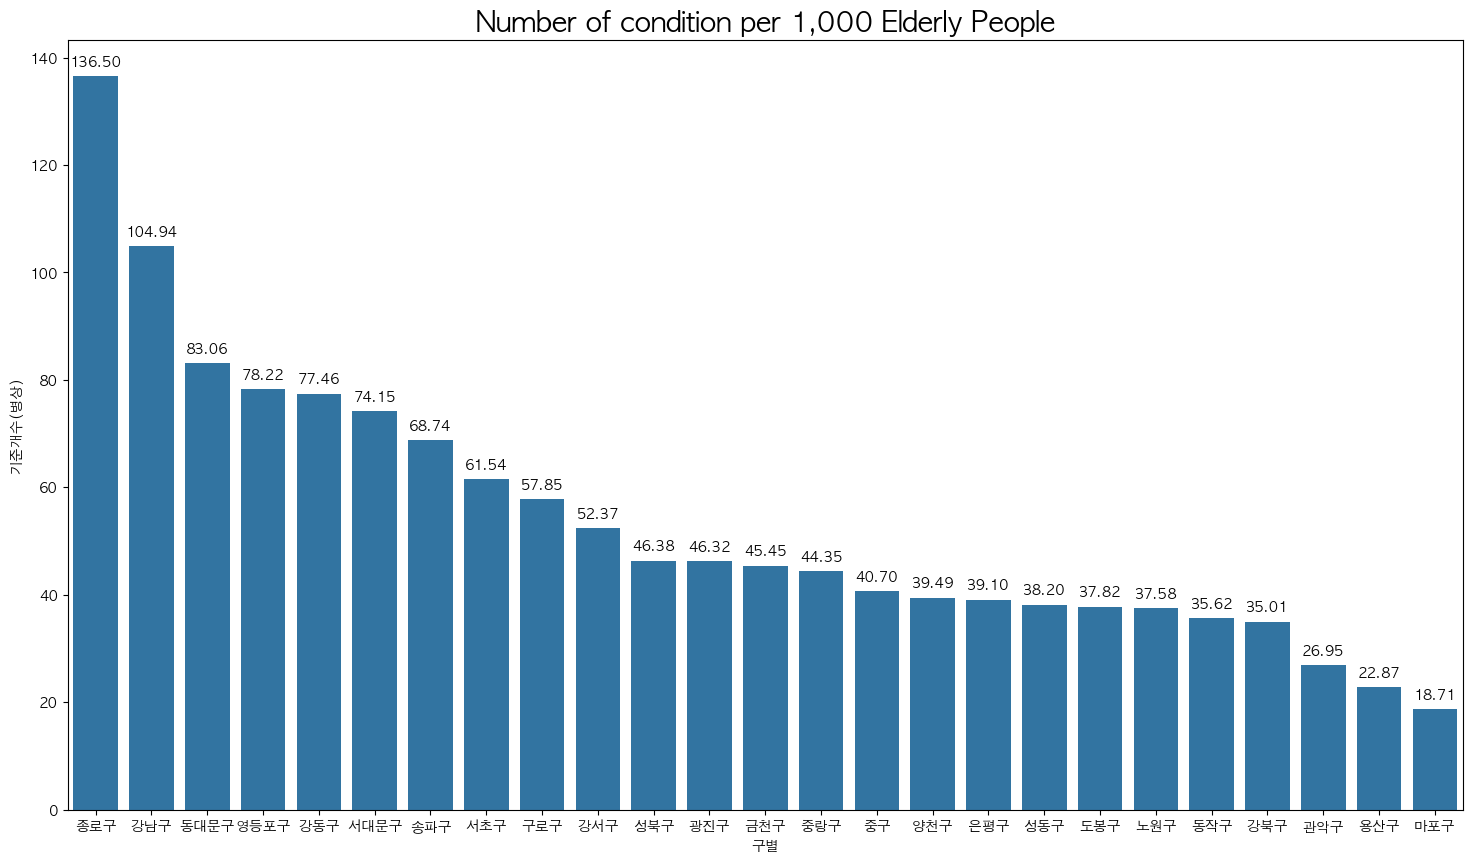

In [51]:
medical_sorted = result_medical.sort_values(by='기준개수(병상)', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=medical_sorted, x='구별', y='기준개수(병상)')
plt.title("Number of condition per 1,000 Elderly People", fontdict={'fontsize' : 20})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

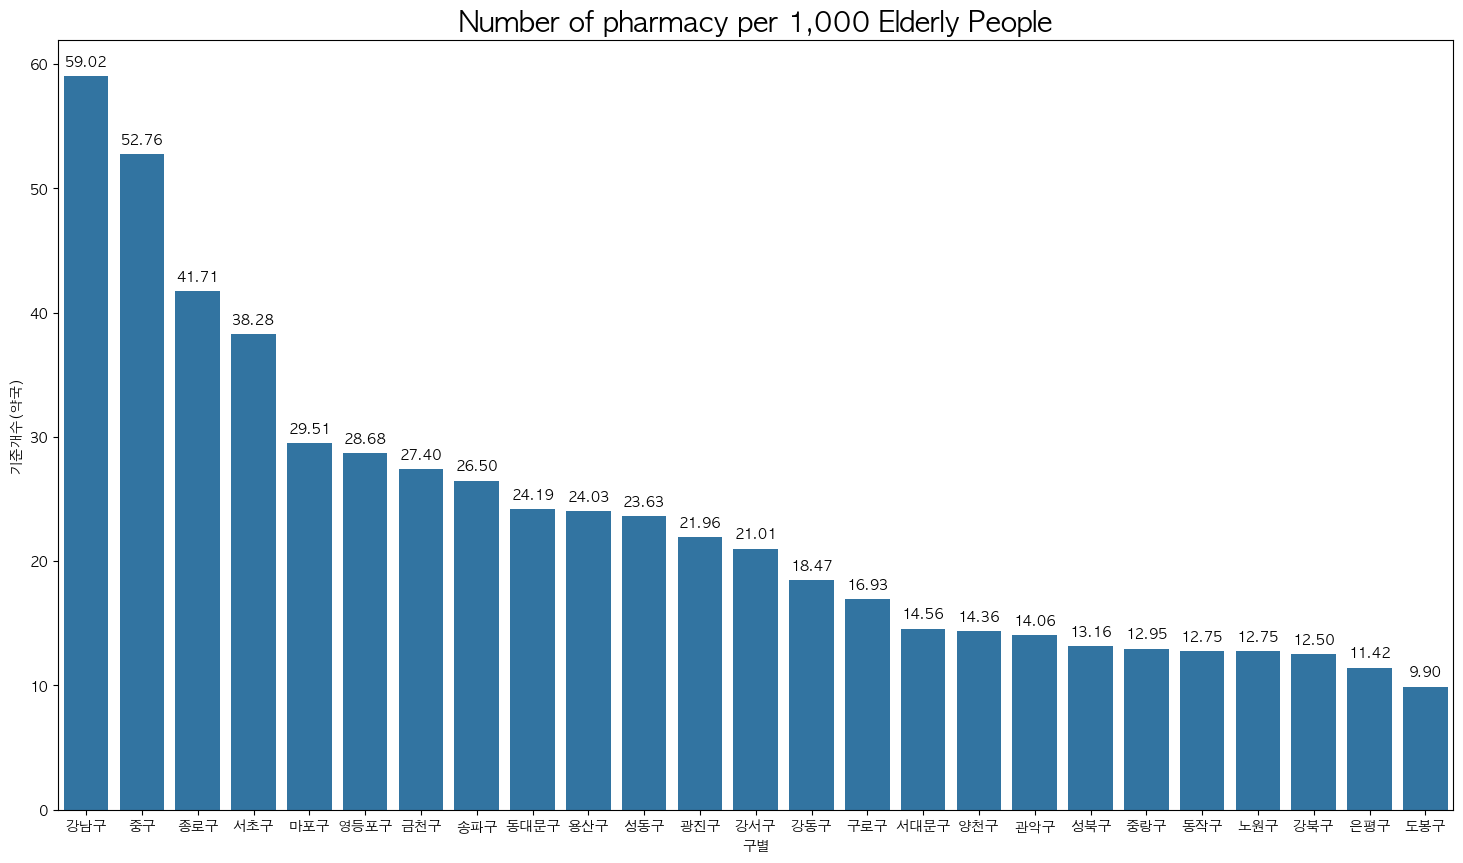

In [52]:
medical_sorted = result_medical.sort_values(by='기준개수(약국)', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=medical_sorted, x='구별', y='기준개수(약국)')
plt.title("Number of pharmacy per 1,000 Elderly People", fontdict={'fontsize' : 20})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()